# Capstone Neural Networks

In [1]:
#Importing Libraries and Autheticating
import pandas as pd
import numpy as np
from google.colab import auth
auth.authenticate_user()

In [2]:
import pandas_gbq

Demographics= pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Demographics`',project_id='surveyproject-378222', dialect='standard') 
Accommodation = pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Accommodation`',project_id='surveyproject-378222', dialect='standard')
Accommodation_feedback=pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Accommodation_feedback`',project_id='surveyproject-378222', dialect='standard')
Academic = pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Academic`',project_id='surveyproject-378222', dialect='standard')
Academic_feedback=pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Academic_feedback`',project_id='surveyproject-378222', dialect='standard')
Services = pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Services`',project_id='surveyproject-378222', dialect='standard')
Feedback= pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Feedback`',project_id='surveyproject-378222', dialect='standard') 
Base_Survey_Table= pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Base_Survey_Table`',project_id='surveyproject-378222', dialect='standard') 

Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|
Downloading: 100%|██████████|


In [3]:
acf = Accommodation_feedback.copy()
label_map = {'\xa0Dissatisfied': 2, 'Neutral': 3, 'Highly Dissatisfied': 1, 'Satisfied': 4, 'Highly Satisfied': 5}
cols_to_map = ['Accm_finding_score', 'Accm_Quality_Score', 'Accm_affordibility_score','Commute_score','Needs_Availibility_Score']
acf[cols_to_map] = acf[cols_to_map].applymap(label_map.get)
weights = {'A': 0.20, 'B': 0.20, 'C': 0.20, 'D': 0.20, 'E': 0.20}
acf['Acc_score'] = ((acf['Accm_finding_score']*weights['A']) + (acf['Accm_Quality_Score']*weights['B']) + (acf['Accm_affordibility_score']*weights['C'])+ (acf['Commute_score']*weights['D']) + (acf['Needs_Availibility_Score']*weights['E']))
acf['Scaled_Acc_score']=acf['Acc_score']/5
acc_Score =acf[['ID','Acc_score']]
s_acc_Score =acf[['ID','Scaled_Acc_score']]
acf.head()

,ID,Accm_finding_score,Accm_Quality_Score,Accm_affordibility_score,Commute_score,Needs_Availibility_Score,Acc_score,Scaled_Acc_score
0,91,3,3,2,3,3,2.8,0.56
1,276,3,3,3,3,3,3.0,0.60
2,158,3,3,3,3,3,3.0,0.60
3,14,3,3,2,3,3,2.8,0.56
4,288,3,3,3,3,3,3.0,0.60


In [4]:
af=Academic_feedback.copy()
weights = {'A': 0.25, 'B': 0.25, 'C': 0.0, 'D': 0.25, 'E': 0.25}
af['Acd_score'] = ((af['Timetable_Schedules_score']*weights['A']) + (af['Section_Allocation_score']*weights['B']) + (af['Class_Hours_Score']*weights['C'])+ (af['Course_Contents_Score']*weights['D']) + (af['Afterclass_Workload_score']*weights['E']))
af['Scaled_Acd_score']=af['Acd_score']/5
acd_score =af[['ID','Acd_score']]
s_acd_score =af[['ID','Scaled_Acd_score']]
af.head()

,ID,Timetable_Schedules_score,Section_Allocation_score,Class_Hours_Score,Course_Contents_Score,Afterclass_Workload_score,Acd_score,Scaled_Acd_score
0,323,1,1,1,1,1,1.0,0.2
1,306,1,1,1,1,1,1.0,0.2
2,322,1,1,1,1,1,1.0,0.2
3,316,1,1,1,1,1,1.0,0.2
4,195,1,1,1,1,1,1.0,0.2


## Method 1 : Label Encoding

In [6]:
import warnings
warnings.filterwarnings("ignore")

#Demographics 2
d2=Demographics[["ID","Education_lvl","Majors"]]
#Demographics 3
d3=Demographics[["ID","Work_exp","Yrs_exp","Field_of_exp"]]
#Demographics 4
d4=Demographics[["ID","Age","Gender"]]

#Label Encoding
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
mapping_m = {"Other": 0, "Science": 1, "Engineering": 2,"Commerce/Accounting": 3,"Mathematics/Statistics": 4, "Business/Administration": 5,"Technology (Computer Science/Information Technology)": 6}
mapping_ed = {"Bachelor's degree (BSc, B.Ed., B.Tech, B.Law...)": 0, 'Post Graduate Diploma': 1, "Master's degree (MCA, MBA, M.Tech, MSc...)": 2,"Doctorate (PhD, M.Phil)": 3}
mapping_yrs = { "2 - 5 Years": 1, "6 - 10 Years": 2,"10 - 15 Years": 3,"0 - 1 Years": 0, "15 + Years": 4}
mapping_gender = {"Prefer not to say": 0, 'Male': 1, "Female": 2}
mapping_age = {"18-25":0, "26-35":1, "36-45": 2,"45 and above": 3}

d2['Enc_Edcucation_lvl'] = d2['Education_lvl'].map(mapping_ed)
d2['Enc_Majors'] = d2['Majors'].map(mapping_m)
d3['Enc_Yrs_exp'] = d3['Yrs_exp'].map(mapping_yrs)
d4['Enc_Age'] = d4['Age'].map(mapping_age)
d4['Enc_Gender'] = d4['Gender'].map(mapping_gender)

d3["Enc_Yrs_exp"]=d3["Enc_Yrs_exp"].replace(np.nan,0)

demo1= pd.merge(d2, d3, on='ID')
demo1 = pd.merge(demo1, d4, on='ID')

demo1=demo1.drop(["Education_lvl","Majors","Work_exp","Yrs_exp","Field_of_exp","Age","Gender"],axis=1)
demo1 = demo1.astype(int)
demo1

,ID,Enc_Edcucation_lvl,Enc_Majors,Enc_Yrs_exp,Enc_Age,Enc_Gender
0,119,0,0,0,0,1
1,168,1,0,1,1,1
2,103,0,0,1,1,2
3,174,0,0,1,1,2
4,8,0,0,2,1,1
...,...,...,...,...,...,...
348,273,0,6,2,1,1
349,199,0,6,2,1,2
350,2,2,6,2,1,1
351,11,2,6,3,1,1


## Final DF

In [7]:
df1= pd.merge(demo1, acc_Score, on='ID')
df1 = pd.merge(df1, acd_score, on='ID')
df1['Acd_score']=df1['Acd_score']
df1['Acc_score']=df1['Acc_score']
df1

,ID,Enc_Edcucation_lvl,Enc_Majors,Enc_Yrs_exp,Enc_Age,Enc_Gender,Acc_score,Acd_score
0,119,0,0,0,0,1,4.6,3.0
1,168,1,0,1,1,1,3.4,2.5
2,103,0,0,1,1,2,3.4,3.5
3,174,0,0,1,1,2,3.4,3.5
4,8,0,0,2,1,1,4.0,2.75
...,...,...,...,...,...,...,...,...
348,273,0,6,2,1,1,2.8,2.25
349,199,0,6,2,1,2,2.8,4.75
350,2,2,6,2,1,1,4.0,3.5
351,11,2,6,3,1,1,4.0,4.25


In [8]:
df1=df1.astype('float')
X=df1.drop(['ID','Acd_score'],axis=1)
y=df1['Acd_score']

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Nadam
from keras.layers import Activation
from keras import backend as K

sc= StandardScaler()
x= sc.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

### FFNN

In [43]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD, RMSprop, Nadam
from keras.layers import Activation
from keras import backend as K

def swish(x, beta=9):
    return x * K.sigmoid(beta * x)
sc= StandardScaler()
x= sc.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

#model
model = Sequential()
model.add(Dense(300, input_dim=X_train.shape[1], activation=swish))
model.add(Dropout(0.5))
model.add(Dense(200, activation=swish))
model.add(Dropout(0.5))
model.add(Dense(200, activation=swish))
model.add(Dropout(0.5))
model.add(Dense(100, activation=swish))
model.add(Dropout(0.5))
model.add(Dense(100, activation=swish))
model.add(Dropout(0.5))
model.add(Dense(50, activation=swish))
model.add(Dropout(0.5))
model.add(Dense(1, activation='linear'))
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate= 0.003))

# Train the model
model.fit(X_train, y_train, epochs=250, batch_size=32, verbose=1)

# Evaluate the model on the test set
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)

# Print the rounded predicted values and actual test values side by side
print("Mean squared error:", mse)
print("Mean absolute error:", mae)
print("Root mean squared error:", rmse)
print("R-squared:", r2)

Epoch 1/250
9/9 [==============================] - 1s 6ms/step - loss: 6.3433
Epoch 2/250
9/9 [==============================] - 0s 6ms/step - loss: 3.1057
Epoch 3/250
9/9 [==============================] - 0s 6ms/step - loss: 2.6895
Epoch 4/250
9/9 [==============================] - 0s 6ms/step - loss: 2.5123
Epoch 5/250
9/9 [==============================] - 0s 6ms/step - loss: 2.3364
Epoch 6/250
9/9 [==============================] - 0s 7ms/step - loss: 2.5253
Epoch 7/250
9/9 [==============================] - 0s 5ms/step - loss: 2.4827
Epoch 8/250
9/9 [==============================] - 0s 5ms/step - loss: 2.1452
Epoch 9/250
9/9 [==============================] - 0s 6ms/step - loss: 1.9383
Epoch 10/250
9/9 [==============================] - 0s 5ms/step - loss: 1.8330
Epoch 11/250
9/9 [==============================] - 0s 5ms/step - loss: 1.6268
Epoch 12/250
9/9 [==============================] - 0s 6ms/step - loss: 1.5961
Epoch 13/250
9/9 [==============================] - 0s 6ms/st

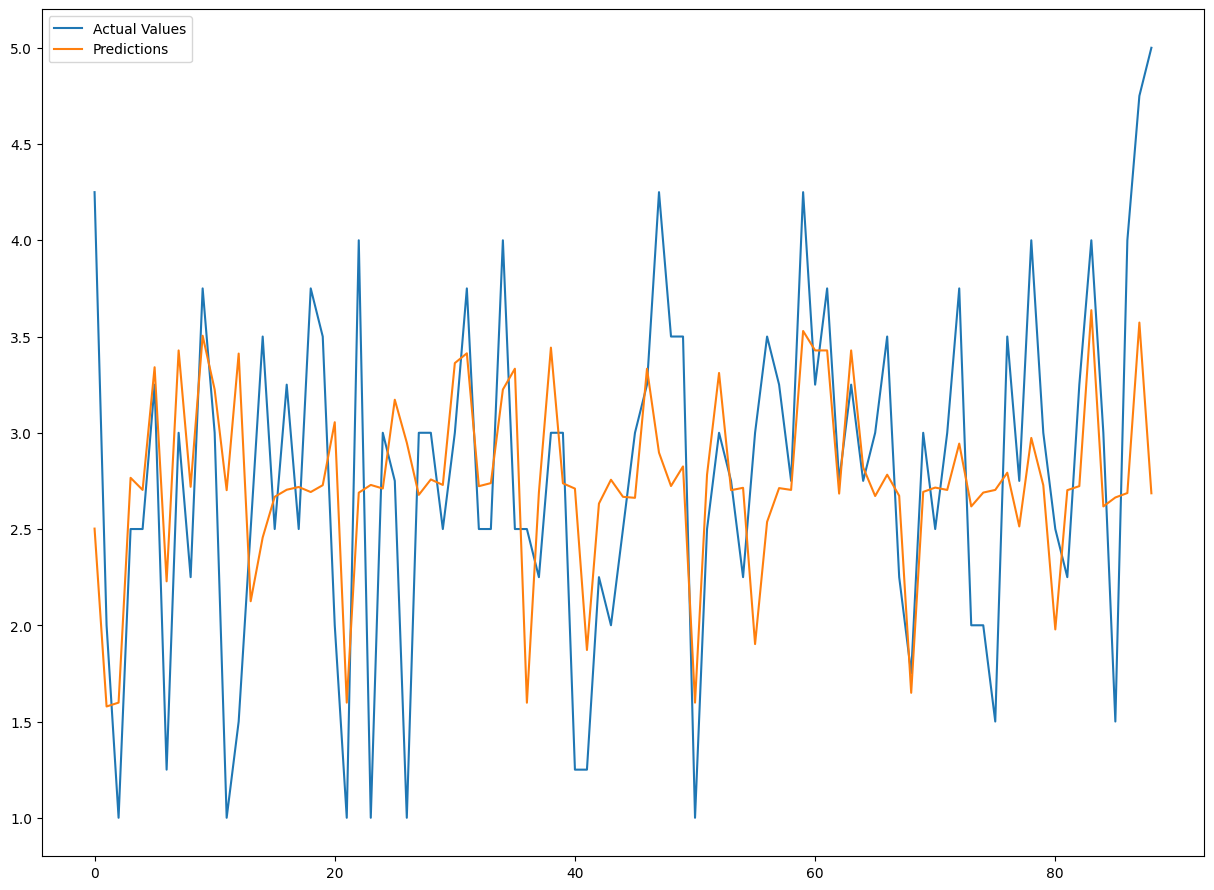

In [44]:
import numpy as np
import matplotlib.pyplot as plt
y_test_np = y_test.values
y_pred_np = y_pred.flatten()
fig, ax = plt.subplots(figsize=(15, 11))
ax.plot(y_test_np, label='Actual Values')
ax.plot(y_pred_np, label='Predictions')
ax.legend()
plt.show()


In [45]:
# Convert pandas Series to numpy array and flatten
y_test_np = y_test.values
y_pred_np = y_pred.flatten()

# Create a DataFrame with y_test_np and y_pred_np columns
Acu_vs_pre = pd.DataFrame({'Actual': y_test_np, 'Predicted': y_pred_np})


# Add a unique ID column
Acu_vs_pre = Acu_vs_pre.reset_index()
Acu_vs_pre = Acu_vs_pre.rename(columns={'index': 'ID'})

Acu_vs_pre = Acu_vs_pre.round(2)
Acu_vs_pre.head()

,ID,Actual,Predicted
0,0,4.25,2.50
1,1,2.00,1.58
2,2,1.00,1.60
3,3,2.50,2.77
4,4,2.50,2.70


In [46]:
Acu_vs_pre.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         89 non-null     int64  
 1   Actual     89 non-null     float64
 2   Predicted  89 non-null     float32
dtypes: float32(1), float64(1), int64(1)
memory usage: 1.9 KB


### Creating schema for above tables

In [14]:
from google.cloud import bigquery
#Connecting Big-Query Project 
client = bigquery.Client(project='surveyproject-378222')
sc = """
DROP TABLE IF EXISTS `surveyproject-378222.Capstone_Project.Act_vs_pre`;
"""
query_job = client.query(sc)
query_job.result()
table_id = 'surveyproject-378222.Capstone_Project.Act_vs_pre'

# Defining the schema for the new table
schema = [
    bigquery.SchemaField('ID', 'INTEGER',mode='REQUIRED'),
    bigquery.SchemaField('Actual', 'FLOAT'),
    bigquery.SchemaField('Predicted', 'FLOAT'),
    ]

    # If the table does not exist, create it
table = bigquery.Table(table_id, schema=schema)
table = client.create_table(table)
print(f'Table {table.table_id} created in BigQuery.')


project_id = 'surveyproject-378222'

#Inserting Data into to Big-Query Base Table
client = bigquery.Client(project=project_id)
job_config = bigquery.LoadJobConfig()
job_config.source_format = bigquery.SourceFormat.CSV
job_config.write_disposition = bigquery.WriteDisposition.WRITE_TRUNCATE
job = client.load_table_from_dataframe(Acu_vs_pre, table_id, job_config=job_config)
job.result()

Table Act_vs_pre created in BigQuery.


LoadJob<project=surveyproject-378222, location=northamerica-northeast2, id=13be38b0-7f0b-48b2-b788-e3eb17a0d8a5>

In [15]:
#Reading data from BigQuery to view the push data
Act_vs_pre= pandas_gbq.read_gbq(f'SELECT * FROM `surveyproject-378222.Capstone_Project.Act_vs_pre`',project_id='surveyproject-378222', dialect='standard') 

Downloading: 100%|██████████|


In [16]:
Act_vs_pre

,ID,Actual,Predicted
0,1,2.00,1.81
1,20,2.00,2.96
2,43,2.00,2.86
3,73,2.00,2.54
4,74,2.00,2.31
...,...,...,...
84,41,1.25,2.33
85,12,1.50,3.40
86,75,1.50,2.83
87,85,1.50,2.42


### CNN

In [17]:
X1 = np.expand_dims(X, axis=2)
X1.shape

(353, 6, 1)

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler,MaxAbsScaler,RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from keras.layers import Dense, Dropout
from keras.optimizers import Adam, SGD
from keras.layers import Activation
from keras import backend as K

def swish(x, beta=2):
    return x * K.sigmoid(beta * x)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X1, y, test_size=0.20, random_state=42)
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
from tensorflow.keras.activations import relu
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np


#model
model = Sequential()
model.add(Conv1D(filters=50,padding='same',kernel_size=3, activation=swish, input_shape=(6,1)))
model.add(Conv1D(filters=30, padding='same' ,kernel_size=3, activation=swish))
model.add(Flatten())
model.add(Dense(units=20, activation=swish))
model.add(Dense(units=1, activation='linear'))

# Compile model
model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate = 0.001))

# Train model
model.fit(X_train, y_train, epochs=200, batch_size=128, validation_data=(X_test, y_test), verbose=1)

# Evaluate model on test set
y_pred = model.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
r2 = r2_score(y_test, y_pred)
print("MAE:", mae)
print("RMSE:", rmse)
print("R2:", r2)



Epoch 1/200
3/3 [==============================] - 1s 119ms/step - loss: 8.1941 - val_loss: 5.6293
Epoch 2/200
3/3 [==============================] - 0s 20ms/step - loss: 6.0333 - val_loss: 4.0526
Epoch 3/200
3/3 [==============================] - 0s 21ms/step - loss: 4.2175 - val_loss: 2.7289
Epoch 4/200
3/3 [==============================] - 0s 24ms/step - loss: 2.7219 - val_loss: 1.7988
Epoch 5/200
3/3 [==============================] - 0s 20ms/step - loss: 1.7794 - val_loss: 1.4527
Epoch 6/200
3/3 [==============================] - 0s 20ms/step - loss: 1.5413 - val_loss: 1.5515
Epoch 7/200
3/3 [==============================] - 0s 29ms/step - loss: 1.7287 - val_loss: 1.5267
Epoch 8/200
3/3 [==============================] - 0s 18ms/step - loss: 1.6403 - val_loss: 1.2622
Epoch 9/200
3/3 [==============================] - 0s 18ms/step - loss: 1.3475 - val_loss: 1.0541
Epoch 10/200
3/3 [==============================] - 0s 21ms/step - loss: 1.1632 - val_loss: 0.9703
Epoch 11/200
3/3 [

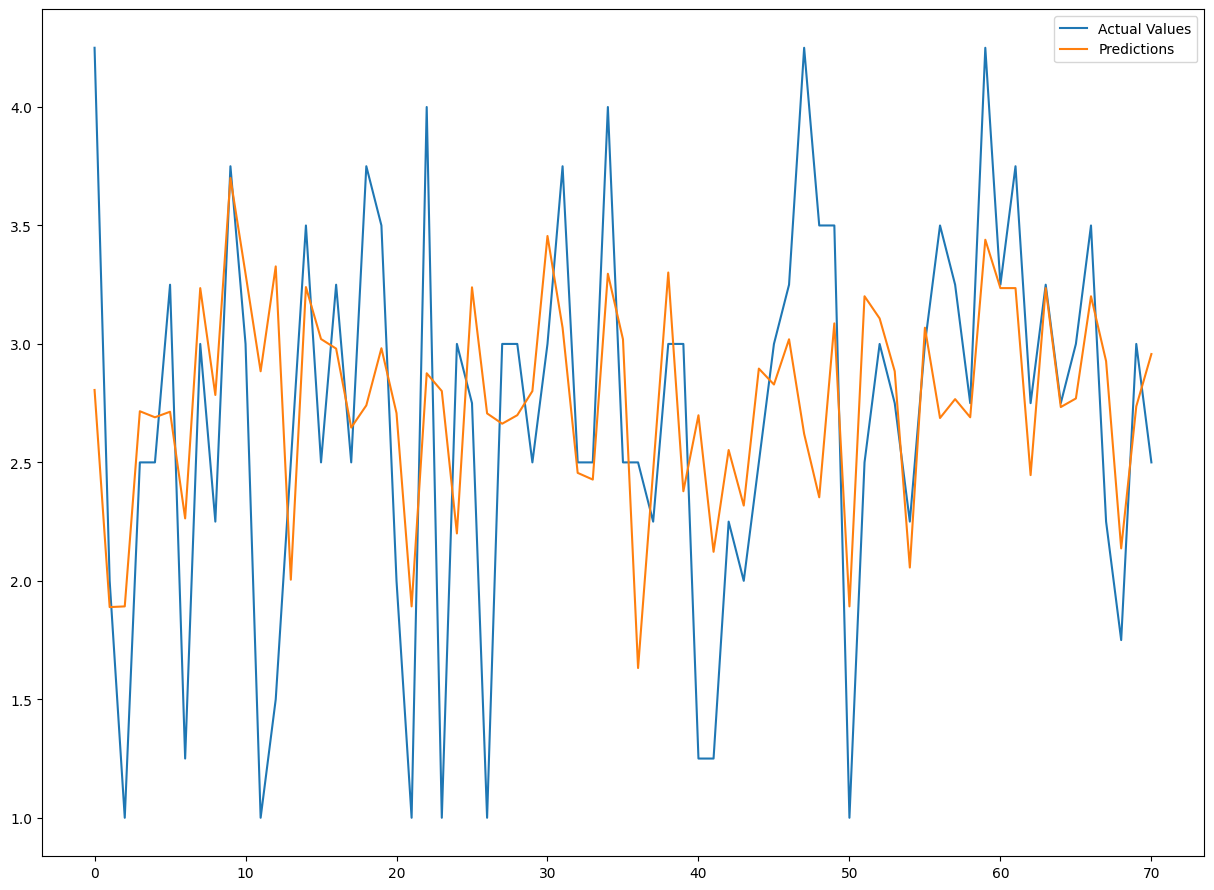

In [19]:
import numpy as np
import matplotlib.pyplot as plt
y_test_np = y_test.values
y_pred_np = y_pred.flatten()

# Plot predictions and actual values with larger size
fig, ax = plt.subplots(figsize=(15, 11))
ax.plot(y_test_np, label='Actual Values')
ax.plot(y_pred_np, label='Predictions')
ax.legend()
plt.show()
